### Title of Project: Heart Disease Prediction

`Author of notebook:` [Usman Khan](https://github.com/UsmanK7)\
`Date: ` 31 Jan 2025 \
`Dataset used: ` [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data)


# Meta Data

## Context
This is a multivariate type of dataset, meaning it provides or involves a variety of separate mathematical or statistical variables for multivariate numerical data analysis. It is composed of 14 attributes:

- Age  
- Sex  
- Chest pain type  
- Resting blood pressure  
- Serum cholesterol  
- Fasting blood sugar  
- Resting electrocardiographic results  
- Maximum heart rate achieved  
- Exercise-induced angina  
- Oldpeak — ST depression induced by exercise relative to rest  
- Slope of the peak exercise ST segment  
- Number of major vessels  
- Thalassemia  

This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date.  

One of the major tasks for this dataset is to predict whether a given patient has heart disease based on the provided attributes. Another experimental task is to diagnose and find insights from the dataset that can help in understanding heart disease better.

## Content

### Column Descriptions:

- **id**: Unique ID for each patient  
- **age**: Age of the patient in years  
- **origin**: Place of study  
- **sex**: Male/Female  
- **cp**: Chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])  
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)  
- **chol**: Serum cholesterol in mg/dl  
- **fbs**: If fasting blood sugar > 120 mg/dl  
- **restecg**: Resting electrocardiographic results  
  - Values: [normal, ST-T abnormality, left ventricular hypertrophy]  
- **thalach**: Maximum heart rate achieved  
- **exang**: Exercise-induced angina (True/False)  
- **oldpeak**: ST depression induced by exercise relative to rest  
- **slope**: Slope of the peak exercise ST segment  
- **ca**: Number of major vessels (0-3) colored by fluoroscopy  
- **thal**: [normal, fixed defect, reversible defect]  
- **num**: The predicted attribute (presence of heart disease)  

### Acknowledgements

#### Creators:
- **Hungarian Institute of Cardiology, Budapest**: Andras Janosi, M.D.  
- **University Hospital, Zurich, Switzerland**: William Steinbrunn, M.D.  
- **University Hospital, Basel, Switzerland**: Matthias Pfisterer, M.D.  
- **V.A. Medical Center, Long Beach and Cleveland Clinic Foundation**: Robert Detrano, M.D., Ph.D.  

#### Relevant Papers:
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989).  
  *International application of a new probability algorithm for the diagnosis of coronary artery disease.*  
  American Journal of Cardiology, 64, 304–310.  

- **David W. Aha & Dennis Kibler**  
  *Instance-based prediction of heart-disease presence with the Cleveland database.*  

- Gennari, J.H., Langley, P., & Fisher, D. (1989).  
  *Models of incremental concept formation.*  
  Artificial Intelligence, 40, 11–61.  

#### Citation Request
The authors of the dataset have requested that any publications resulting from the use of the data include the names of the principal investigators responsible for data collection at each institution:

- **Hungarian Institute of Cardiology, Budapest**: Andras Janosi, M.D.  
- **University Hospital, Zurich, Switzerland**: William Steinbrunn, M.D.  
- **University Hospital, Basel, Switzerland**: Matthias Pfisterer, M.D.  
- **V.A. Medical Center, Long Beach and Cleveland Clinic Foundation**: Robert Detrano, M.D., Ph.D.  


## Aims and Objectives:

### Import libraries
Let's start the project by import the necessary libraries required for data manipulation, visualization, and machine learning.


In [2]:
# import libraries

# 1. Data manipulation
import pandas as pd
import numpy as np

# 2. Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 3. Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler

# 4. Data Splitting
from sklearn.impute import SimpleImputer, KNNImputer

# 5. Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 

# 6. Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 7. For classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset
In this section, we will load the heart disease dataset into a pandas DataFrame for further analysis and processing.

In [4]:
# load the dataset from the csv file using pandas
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (Eda)
Here we will explore each column

In [5]:
# Expolaring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
# Data shape
df.shape

(920, 16)

In [7]:
# id column
df['id'].min(), df['id'].max()

(1, 920)

In [8]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

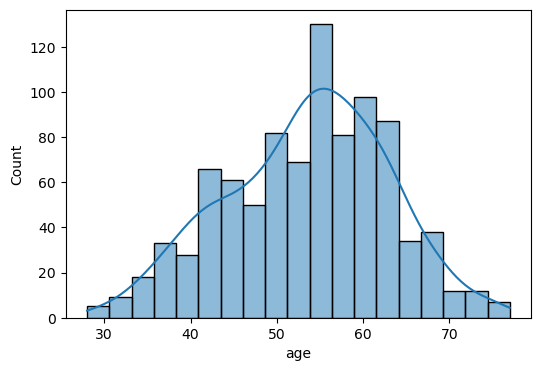

In [15]:
# make a histogram between age and sex
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', kde=True)


Mean: 53.51086956521739
Median: 54.0
Mode: 54


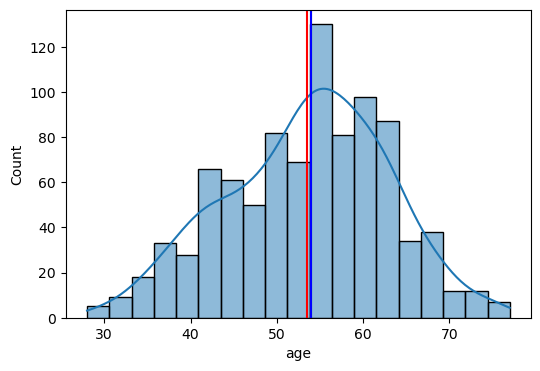

In [16]:
# plot the mean, median and mode of age column 
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', kde=True)
plt.axvline(df['age'].mean(), color='red', label='Mean')
plt.axvline(df['age'].median(), color='green', label='Median')
plt.axvline(df['age'].mode()[0], color='blue', label='Mode')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

In [18]:
# plot the histogram of age column using plotly and coloring it by sex column
fig = px.histogram(data_frame=df, x='age',color='sex')
fig.show()

In [21]:
# find the number of unique values in sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [23]:
# calculate the percentages of male and females
male_count = 726
female_count = 194
total_count  = male_count + female_count

# calculate the percentage
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# print the results
print(f"Male percentage in the dataset: {male_percentage:.2f}%")
print(f"Female percentage in the dataset: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count)/female_count ) * 100
print(f"Difference in percentage: {difference_percentage:.2f}%")

Male percentage in the dataset: 78.91%
Female percentage in the dataset: 21.09%
Difference in percentage: 274.23%


In [20]:
# find the value count of age column by grouping by sex column
df.groupby('sex')['age'].value_counts() 

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [24]:
# lets deal with dataset column
# find the unique values in dataset column
df['dataset'].unique()  

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [25]:
# find unique values in the dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

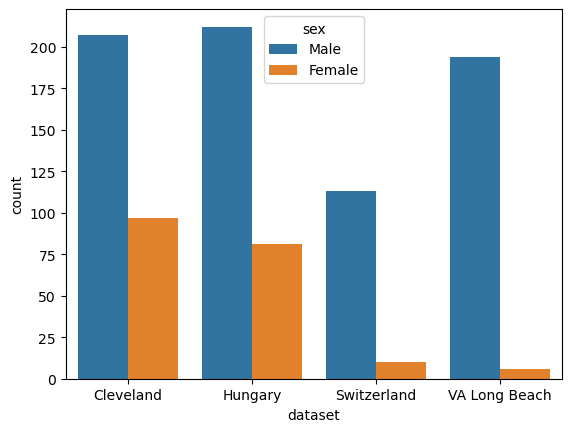

In [27]:
# plot the countplot of dataset column
sns.countplot(data=df, x='dataset', hue='sex')

# print the dataset column grouped by sex
df.groupby('sex')['dataset'].value_counts() 

In [ ]:
# make a plot of age column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset
print('Mean:', df.groupby('dataset')['age'].mean())
print('Median:', df.groupby('dataset')['age'].median())
print('Mode:', df.groupby('dataset')['age'].apply(lambda x: x.mode()[0]))

Mean: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
Median: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
Mode: dataset
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64


### Output

1. People get heart disease after 28 years old
2. Most people gets it at the age of 53-54 years
3. Most of males and females get diagonse with heart disease at the age of 54-55
4. Male percentage in the dataset: 78.91%
5. Female percentage in the dataset: 21.09%
6. Difference in percentage: 274.23%
7. We have highest number of people from Cleveland which are 304 and loweset from Switzerland which are 123
   1. The highest number of females in this dataset are from Cleveland which are 97 and loweset in VA Long Beach which are 6
   2. The highest number of males in this dataset are from Cleveland which are 212 and loweset in VA Long Beach which are 113
